# **Weather prediction**
the data is from NOAA websit
let's start


## importing the lebreries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [2]:
data = pd.read_csv("Wether dataset.csv")
data.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


quick check of the data


In [3]:
data.shape

(17503, 36)

In [4]:
null = data.isnull().sum() / len(data)
null

STATION    0.000000
NAME       0.000000
DATE       0.000000
ACMH       0.666114
ACSH       0.666114
AWND       0.503228
DAPR       0.999543
FMTM       0.874879
FRGT       0.999886
MDPR       0.999543
PGTM       0.513683
PRCP       0.016112
SNOW       0.349826
SNWD       0.342741
TAVG       0.883620
TMAX       0.000628
TMIN       0.000800
TSUN       0.934240
WDF1       0.666114
WDF2       0.503171
WDF5       0.508199
WDFG       0.756213
WSF1       0.666114
WSF2       0.503114
WSF5       0.508199
WSFG       0.756213
WT01       0.778667
WT02       0.980346
WT03       0.992573
WT04       0.999771
WT05       0.998343
WT07       0.999886
WT08       0.814717
WT09       0.999886
WT16       0.888305
WT18       0.999829
dtype: float64

In [5]:
data_1 = data[['PRCP' , 'SNOW' , 'SNWD' , 'TMAX' , 'TMIN' , 'DATE']].copy()
data_1.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,DATE
0,0.0,0.0,0.0,49.0,30.0,1960-01-01
1,0.0,0.0,0.0,49.0,29.0,1960-01-02
2,0.0,0.0,0.0,54.0,35.0,1960-01-03
3,0.0,0.0,0.0,54.0,36.0,1960-01-04
4,0.0,0.0,0.0,55.0,33.0,1960-01-05


In [6]:
data_1.columns = ['precip', 'snow' , 'snow_depth' , 'temp_max' , 'temp_min' , 'DATE']
data_1.head()

,precip,snow,snow_depth,temp_max,temp_min,DATE
0,0.0,0.0,0.0,49.0,30.0,1960-01-01
1,0.0,0.0,0.0,49.0,29.0,1960-01-02
2,0.0,0.0,0.0,54.0,35.0,1960-01-03
3,0.0,0.0,0.0,54.0,36.0,1960-01-04
4,0.0,0.0,0.0,55.0,33.0,1960-01-05


set index

In [7]:
data_1 = data_1.set_index('DATE')

In [8]:
data_1.isnull().sum() / len(data)

precip        0.016112
snow          0.349826
snow_depth    0.342741
temp_max      0.000628
temp_min      0.000800
dtype: float64

In [9]:
data_1['precip'].value_counts()

0.00    14224
0.01      443
0.02      203
0.03      124
0.04      105
        ...  
1.05        1
1.38        1
1.95        1
2.01        1
1.28        1
Name: precip, Length: 179, dtype: int64

the most value repeated in the precip is 0
.... so i will fill the null values with 0

In [10]:
data_1['precip'] = data_1['precip'].fillna(0)

In [11]:
data_1['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

the one value of (1) will not give my model anything
 .. so i will dorp if

In [12]:
del data_1['snow']

In [13]:
data_1['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [14]:
del data_1['snow_depth']

the same with snow depth

In [15]:
data_1['temp_max'].isnull().sum()

11

In [16]:
data_1['temp_min'].isnull().sum()

14

will use fill befor method

In [17]:
data_1 = data_1.fillna(method="ffill")

In [18]:
data_1.isnull().sum() / len(data)

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

convertint the index to datatime

In [19]:
data_1.index = pd.to_datetime(data_1.index)

In [20]:
data_1.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=17503)

analyze features

<Axes: xlabel='DATE'>

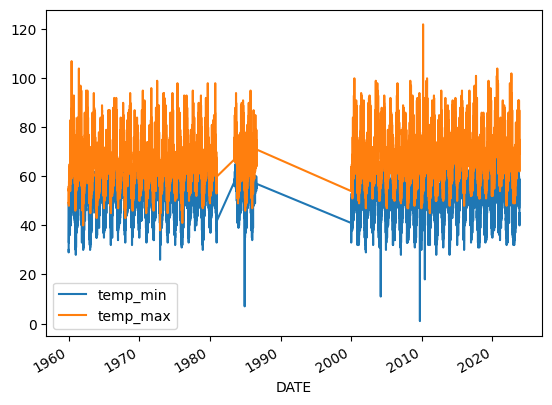

In [21]:
data_1[['temp_min' , 'temp_max']].plot()

<Axes: xlabel='DATE'>

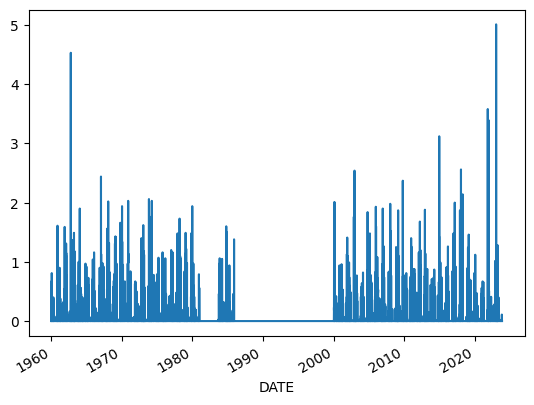

In [22]:
data_1['precip'].plot()

feature engineering and creating new features

In [23]:
data_1.head(10)

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.00,49.0,30.0
1960-01-02,0.00,49.0,29.0
1960-01-03,0.00,54.0,35.0
1960-01-04,0.00,54.0,36.0
1960-01-05,0.00,55.0,33.0
1960-01-06,0.00,53.0,38.0
1960-01-07,0.00,56.0,46.0
1960-01-08,0.45,54.0,49.0
1960-01-09,0.61,51.0,46.0


In [24]:
data_1['target'] =data_1.shift(-1)['temp_max']
data_1.tail(10)

,precip,temp_max,temp_min,target
DATE,,,,
2023-10-24,0.0,69.0,54.0,66.0
2023-10-25,0.0,66.0,55.0,65.0
2023-10-26,0.0,65.0,42.0,62.0
2023-10-27,0.0,62.0,43.0,69.0
2023-10-28,0.0,69.0,43.0,75.0
2023-10-29,0.0,75.0,44.0,70.0
2023-10-30,0.0,70.0,40.0,71.0
2023-10-31,0.0,71.0,40.0,71.0
2023-11-01,0.0,71.0,42.0,74.0


In [25]:
data_1 = data_1.dropna()
data_1.tail()

,precip,temp_max,temp_min,target
DATE,,,,
2023-10-28,0.0,69.0,43.0,75.0
2023-10-29,0.0,75.0,44.0,70.0
2023-10-30,0.0,70.0,40.0,71.0
2023-10-31,0.0,71.0,40.0,71.0
2023-11-01,0.0,71.0,42.0,74.0


spliting the data

In [26]:
predictores = ['precip', 'temp_max' , 'temp_min']
x = data_1[predictores]
y = data_1['target']
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=.3 , random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12251, 3)
(5251, 3)
(12251,)
(5251,)


building our model

In [27]:
rid = Ridge(alpha= .1)
rid.fit(x_train , y_train )
kfold = KFold(n_splits=5  , shuffle = True , random_state=  42)
scores = -cross_val_score(rid , x ,y ,cv = kfold ,scoring = 'neg_mean_absolute_error')
print("Cross-Validation Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")


Cross-Validation Scores:
Fold 1: 3.3839210274771094
Fold 2: 3.5234190178159546
Fold 3: 3.439754227169091
Fold 4: 3.4745235310348916
Fold 5: 3.4233108610106355


In [28]:
mean_absolute_error(y_test , rid.predict(x_test))

3.420443560753246

In [29]:
predictions =rid.predict(x_test)

In [30]:
combined = pd.concat([y_test , pd.Series(predictions ,index  = y_test.index)] , axis =1)
combined.columns = ['acual' , 'predictions']

In [31]:
combined

,acual,predictions
DATE,,
1962-12-22,54.0,52.963561
1984-06-23,68.0,69.394984
1977-11-04,62.0,63.613206
1977-08-01,72.0,78.979400
1975-06-22,63.0,65.797168
...,...,...
1961-05-28,65.0,63.104384
2011-02-04,74.0,63.015134
2000-02-27,55.0,59.733950


<Axes: xlabel='DATE'>

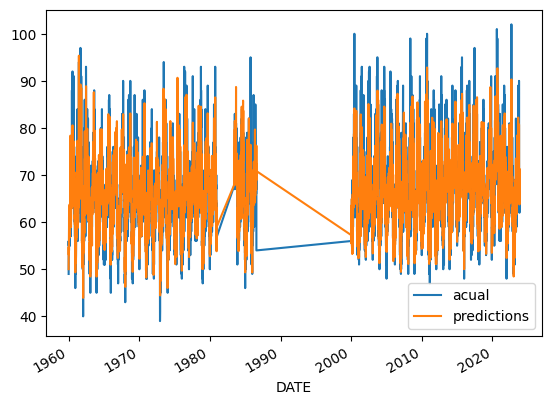

In [32]:
combined.plot()

In [33]:
#function to predict
def create_predictions(predictores , data_1 , model):
  x = data_1[predictores]
  y = data_1['target']
  x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=.3 , random_state = 42)
  model.fit(x_train , y_train )
  predictions =model.predict(x_test)
  erro = mean_absolute_error(y_test , predictions)
  combined = pd.concat([y_test , pd.Series(predictions ,index  = y_test.index)] , axis =1)
  combined.columns = ['acual' , 'predictions']
  return erro , combined

creating new features


In [34]:
data_1['month_max'] = data_1['temp_max'].rolling(30).mean()
data_1.head(40)

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
1960-01-06,0.00,53.0,38.0,56.0,NaN
1960-01-07,0.00,56.0,46.0,54.0,NaN
1960-01-08,0.45,54.0,49.0,51.0,NaN
1960-01-09,0.61,51.0,46.0,55.0,NaN


In [35]:
data_1['month_day_max'] = data_1['month_max'] / data_1['temp_max']
data_1.head(40)

,precip,temp_max,temp_min,target,month_max,month_day_max
DATE,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN,NaN
1960-01-06,0.00,53.0,38.0,56.0,NaN,NaN
1960-01-07,0.00,56.0,46.0,54.0,NaN,NaN
1960-01-08,0.45,54.0,49.0,51.0,NaN,NaN
1960-01-09,0.61,51.0,46.0,55.0,NaN,NaN


In [36]:
data_1['max_min'] = data_1['temp_max'] / data_1['temp_min']

In [41]:
data_1 = data_1.iloc[30: ,:].copy()

In [42]:
predictores = ['precip', 'temp_max' , 'temp_min' , 'month_max' , 'month_day_max' , 'max_min']

In [45]:
model = Ridge(alpha= .1)
eror , com = create_predictions(predictores= predictores , data_1 = data_1 , model = model)

In [46]:
eror

3.3767850037433913

<Axes: xlabel='DATE'>

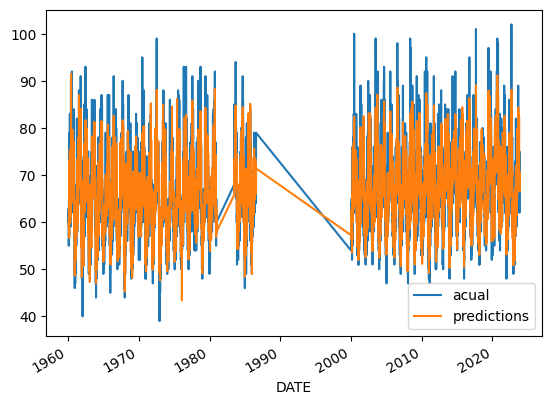

In [47]:
com.plot()

In [49]:
data_1['month_avg'] = data_1['temp_max'].groupby(data_1.index.month).apply(lambda x :x.expanding(1).mean())

<ipython-input-49-9c32022b6afb>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_1['month_avg'] = data_1['temp_max'].groupby(data_1.index.month).apply(lambda x :x.expanding(1).mean())


In [50]:
data_1.head()

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,month_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.0
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.0
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.5
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.0
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.0


In [51]:
data_1['day_year_avg'] = data_1['temp_max'].groupby(data_1.index.year).apply(lambda x :x.expanding(1).mean())

<ipython-input-51-4d9e8b0a90f6>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_1['day_year_avg'] = data_1['temp_max'].groupby(data_1.index.year).apply(lambda x :x.expanding(1).mean())


In [52]:
predictores = ['precip', 'temp_max' , 'temp_min' , 'month_max' , 'month_day_max' , 'max_min'  , 'day_year_avg' , 'month_avg']
eror , com = create_predictions(predictores= predictores , data_1 = data_1 , model = model)

In [53]:
eror

3.3498062346075717